In [1]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")

# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


한글 폰트 설정이 완료되었습니다.
데이터 로드 및 통합이 완료되었습니다.


In [2]:
# 문제 1: 배송사별 평균 배송 소요 시간(배송 시작 ~ 배송 완료)을 계산하고 비교하여 어느 배송사가 가장 빠른지 평가하세요.
# 시각화: 바 차트

# 비즈니스 목적: 물류 파트너(배송사)의 성과를 정량적으로 평가하여 계약을 갱신하거나, 배송이 느린 업체를 교체하는 등의 의사결정에 활용합니다.

배송사별 평균 배송 소요 시간 (일):
shipping_company
대한통운     2.954209
롯데택배     3.002052
우체국택배    3.002668
한진택배     3.006098
Name: shipping_duration, dtype: float64


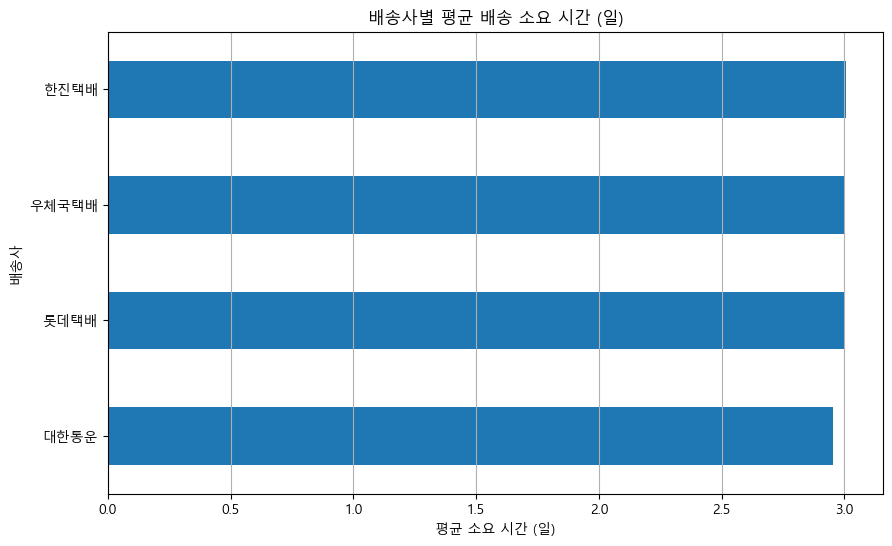

In [3]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 2: 고객의 거주 도시를 수도권/비수도권으로 나누고, 지역별 평균 배송 소요 시간에 차이가 있는지 분석하세요.
# 비즈니스 목적: 특정 지역에서 배송 지연이 발생하고 있는지 파악하고, 
# 해당 지역의 물류 파트너를 변경하거나 추가적인 물류 거점을 확보하는 등의 전략을 수립합니다.

지역별 평균 배송 소요 시간:
region
비수도권    2.996818
수도권     2.984887
Name: shipping_duration, dtype: float64


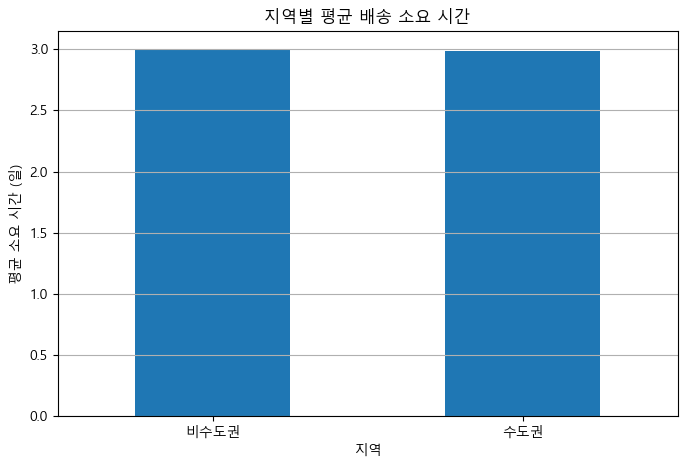

In [4]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 3: 배송 상태(shipping_status)별 주문 건수 분포를 확인하여 현재 물류 파이프라인의 병목 지점을 추정하세요.
# 시각화: 바 차트

# 비즈니스 목적: 'Preparing'(준비중) 또는 'Shipped'(배송중) 단계에 주문이 과도하게 몰려있다면, 
# 해당 단계(상품 준비, 출고 등)에 문제가 있을 수 있음을 파악하고 원인을 분석합니다.

배송 상태별 주문 건수:
shipping_status
Delivered    5922
Shipped      1769
Preparing     895
Cancelled     457
Name: count, dtype: int64


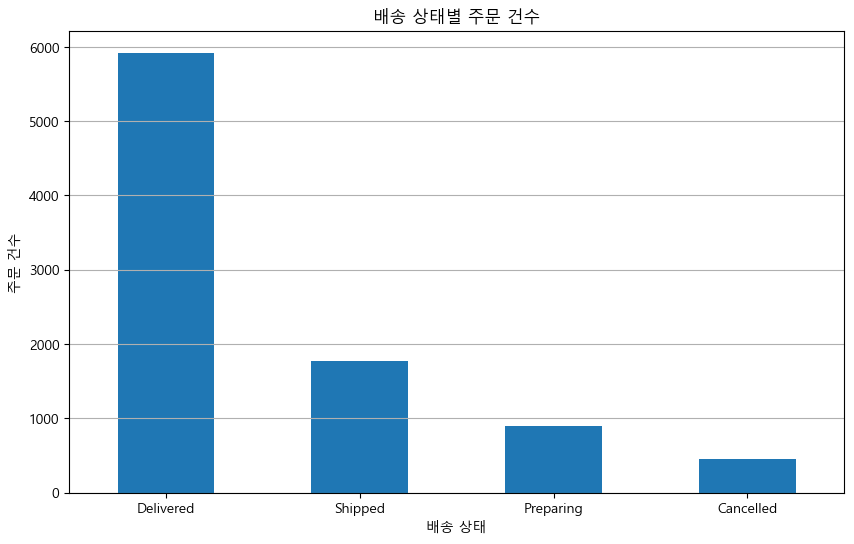

In [5]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 4: 주문 요일(주중/주말)에 따라 배송 시작까지 걸리는 시간(주문~배송 시작)에 차이가 있는지 분석하세요.
# 비즈니스 목적: 주말 주문 건이 물류센터 휴무 등의 이유로 배송 시작이 지연되는지 확인하고, 
# 인력 배치 조정이나 고객 안내 문구 변경 등의 조치를 취합니다.

주문 요일별 평균 배송 시작 소요 시간 (시간):
order_day_type
주말 주문    13.123632
주중 주문    12.905531
Name: time_to_ship, dtype: float64


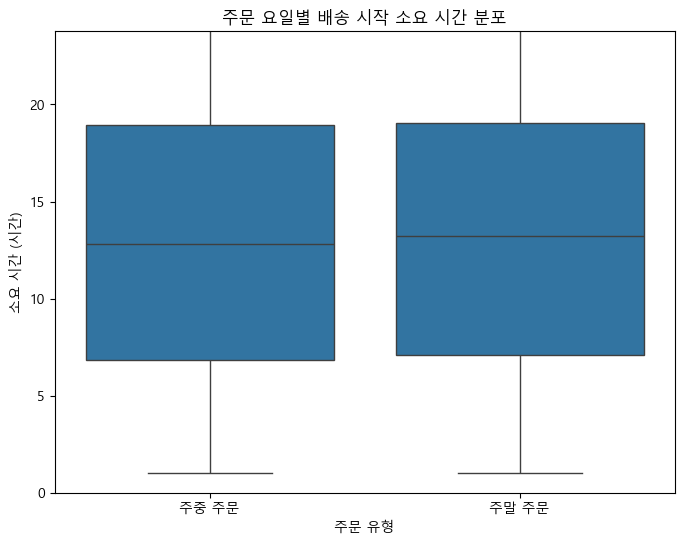

In [6]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 5: 배송 완료까지 걸린 실제 시간과 주문 상품의 재고량 간의 관계를 분석하세요.
# 비즈니스 목적: 재고가 부족한 상품의 배송이 더 오래 걸리는지(예: 다른 물류센터에서 가져오느라) 확인하고, 
# 재고 관리 정책이 배송 속도에 미치는 영향을 평가합니다.

재고량 구간별 평균 배송 소요 시간 (일):
stock_bin
매우 적음    2.980815
적음       3.006200
보통       3.012712
많음       2.934619
매우 많음    3.023952
Name: shipping_duration, dtype: float64


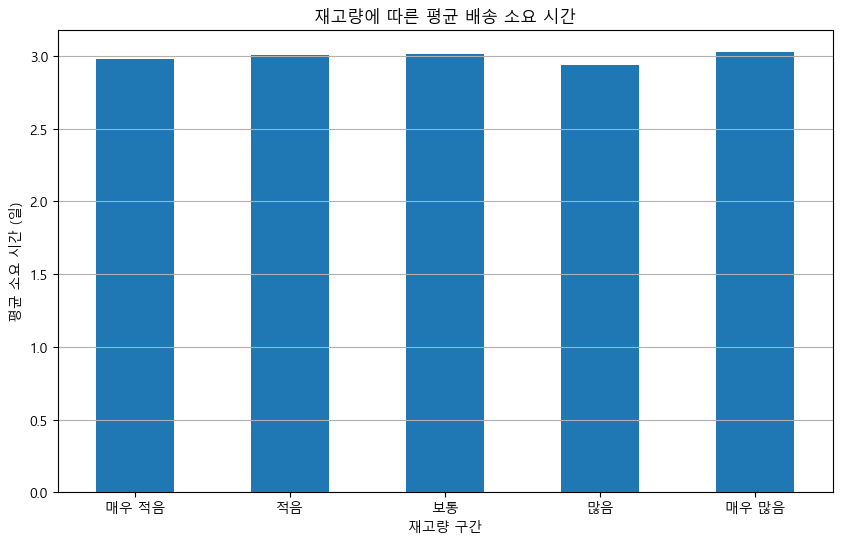

In [7]:
# 출력 결과를 보고 코딩하세요





